In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

import os

os.chdir('../../myprog/nba_machine_learning/csv')
cwd = os.getcwd()
print(cwd)


/Users/koki/Desktop/myprog/nba_machine_learning/csv


In [2]:
df14_15 = pd.read_csv('nba_14-15.csv')

df14_15.drop('Unnamed: 3', axis=1, inplace=True)
df14_15.drop('Rk', axis=1, inplace=True)
df14_15.drop('G', axis=1, inplace=True)
df14_15.drop('Date', axis=1, inplace=True)
df14_15.drop('Opp', axis=1, inplace=True)

df14_15.dropna(inplace = True)

In [3]:
df15_16 = pd.read_csv('nba_15-16.csv')

df15_16.drop('Unnamed: 3', axis=1, inplace=True)
df15_16.drop('Rk', axis=1, inplace=True)
df15_16.drop('G', axis=1, inplace=True)
df15_16.drop('Date', axis=1, inplace=True)
df15_16.drop('Opp', axis=1, inplace=True)

df15_16.dropna(inplace = True)

In [4]:
df14_16 = pd.concat([df14_15,df15_16])

In [5]:
df14_16 = df14_16['W/L']

In [7]:
df_stats14_15 = pd.read_csv('stats14_15_out.csv')
df_stats15_16 = pd.read_csv('stats15_16_out.csv')

df_stats14_15= df_stats14_15.drop(columns=['Unnamed: 0'])
df_stats15_16= df_stats15_16.drop(columns=['Unnamed: 0'])
df_stats = pd.concat([df_stats14_15,df_stats15_16])
#欠損値を０に
df_stats.fillna(0,inplace=True)

In [8]:
df = pd.concat([df14_16,df_stats], axis=1)

In [9]:
X = df.iloc[:, df.columns != 'W/L'].values
y = df.loc[:, 'W/L'].values

In [10]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=60)
rfc = RandomForestClassifier(max_depth=7, min_samples_leaf=14, n_estimators=100, n_jobs=-1, random_state=1000)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=14, n_jobs=-1,
                       random_state=1000)

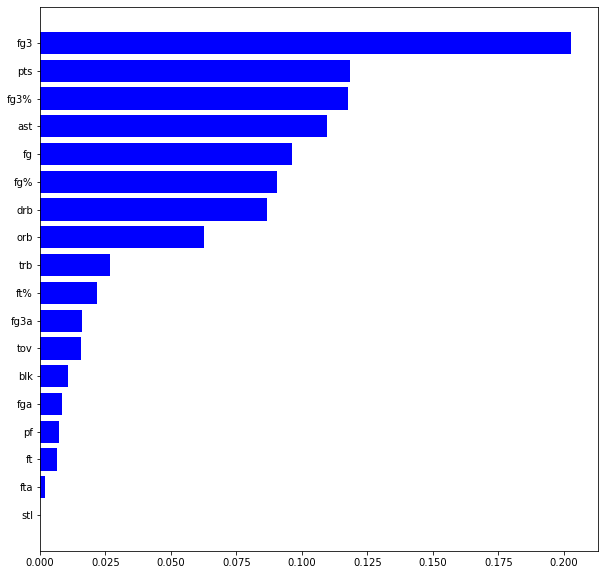

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

features = df.columns[df.columns != 'W/L']
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()

In [13]:
print('Train Score: {}'.format(round(rfc.score(X_train, y_train), 3)))
print(' Test Score: {}'.format(round(rfc.score(X_valid, y_valid), 3)))

Train Score: 0.851
 Test Score: 0.86


In [14]:
X_test = pd.read_csv('stats21_22_out.csv')

In [15]:
X_test.drop('Unnamed: 0', axis=1, inplace=True)

In [16]:
X_test

,fg,fga,fg%,fg3,fg3a,fg3%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,20,49,0.408,4,16,0.250,9,10,0.900,4,20,24,14,6,2,11,10,53
1,24,39,0.615,10,18,0.556,8,11,0.727,3,17,20,18,3,3,12,12,66
2,20,48,0.417,6,18,0.333,14,16,0.875,8,14,22,15,6,1,4,5,60
3,18,46,0.391,6,21,0.286,6,7,0.857,4,16,20,12,6,2,7,8,48
4,21,44,0.477,8,20,0.400,5,6,0.833,3,21,24,17,5,1,10,7,55
5,22,48,0.458,8,23,0.348,3,6,0.500,4,23,27,16,5,4,6,9,55
6,19,42,0.452,12,25,0.480,3,7,0.429,3,23,26,16,5,2,10,8,53
7,21,48,0.438,10,31,0.323,2,2,1.000,6,15,21,15,5,0,6,7,54
8,24,46,0.522,8,23,0.348,13,15,0.867,5,13,18,19,8,0,5,17,69
9,21,48,0.438,8,20,0.400,11,12,0.917,7,12,19,14,5,1,5,12,61


In [17]:
rfc_pred = rfc.predict_proba(X_test)

In [18]:
rfc_pred

array([[0.27119711, 0.72880289],
       [0.04184375, 0.95815625],
       [0.1921752 , 0.8078248 ],
       [0.27721661, 0.72278339],
       [0.05222638, 0.94777362],
       [0.06743987, 0.93256013],
       [0.09713315, 0.90286685],
       [0.18541595, 0.81458405],
       [0.0840068 , 0.9159932 ],
       [0.16856984, 0.83143016]])

In [19]:
rfc_pred.argmax(axis=1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])